# Homework 5 - Gender Differences in University Enrollment

The objective of this homework is to practice visualizing data. To successfully complete this homework, you may use any resources available to you. 

Get the `universities.csv` data. This is data from the [National Center for Education Statistics](https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx). Develop **three** plots:
1. A boxplot of the average number of total enrollment for the states in the U.S. West
    * The States in the U.S. West are
        * Alaska
        * Arizona
        * California
        * Colorado
        * Hawaii
        * Idaho
        * Montana
        * Nevada
        * New Mexico
        * Oregon
        * Utah
        * Washington
        * Wyoming (see prepared list `uswest`)
    * Order the plot based on the number of institutions in the state
2. A boxplot of the average number of enrollment per gender category (hue) and state in the U.S. West
    * Please notice that enrollment numbers for men and women are in two separate columns.
    * Hue requires one column, which means you have to 'melt' the dataset ([Link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).
    * The results should be a dataframe with two rows (one for men, one for women) for each university
3. A ordered barplot of the ratio of admissions for men and women for universities in the Bay Area
    * We assume that the Bay Area is characterized with zip codes that start with `950` and `94`
    * Focus on institutions with more than 1,000 enrollments.
    * Develop the ratio of admissions for women and for men. Standardize this ratio on the mean. 
4. Interpret you plots in terms of gender differences. 

Hints:
* Make sure your plots are nicely formatted (including axes label).
* Explain what you are doing.
* Use references.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

In [7]:
c = students = pd.read_csv('https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
universities.csv')

In [4]:
import seaborn as sn
%matplotlib inline

In [22]:
uswest = ['AK','AZ','CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

In [17]:
c.head(5)

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM
0,100654,Alabama A & M University,35762,AL,1568.0,652.0,916.0,3878.0,2276.0
1,100663,University of Alabama at Birmingham,35294-0110,AL,2021.0,758.0,1263.0,3437.0,2062.0
2,100690,Amridge University,36117-3553,AL,NaN,NaN,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,35899,AL,1213.0,735.0,478.0,1537.0,1930.0
4,100724,Alabama State University,36104-0271,AL,1172.0,434.0,738.0,2862.0,1293.0


In [185]:
df_west = c[c['STABBR'].isin(uswest)].sort_values('INSTNM')
df_grp = df_west.groupby(['STABBR','INSTNM'])['ENRLT'].mean().sort_values(ascending = False).to_frame().reset_index()
df_grp.head()


,STABBR,INSTNM,ENRLT
0,AZ,Arizona State University-Tempe,8230.0
1,AZ,University of Arizona,7753.0
2,CA,University of California-Irvine,6551.0
3,CA,University of California-Los Angeles,6545.0
4,WA,University of Washington-Seattle Campus,6475.0


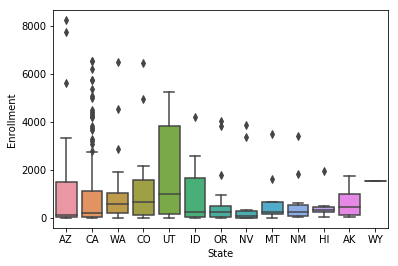

In [240]:
fig1 = sn.boxplot(x="STABBR", y="ENRLT", data=df_grp);
fig1.set(xlabel='State', ylabel='Enrollment');

Bringing two columns in one by using melt function and then grouping data by State,Institution Name and Women/Men Admission Factor.

In [237]:
df_melt = pd.melt(df_west,id_vars = (['INSTNM','STABBR']),value_vars = ['ENRLW','ENRLM'])
df = df_melt.groupby(['STABBR','INSTNM','variable'])['value'].mean().to_frame().reset_index()
df.head()

,STABBR,INSTNM,variable,value
0,AK,AVTEC-Alaska's Institute of Technology,ENRLM,NaN
1,AK,AVTEC-Alaska's Institute of Technology,ENRLW,NaN
2,AK,Alaska Bible College,ENRLM,NaN
3,AK,Alaska Bible College,ENRLW,NaN
4,AK,Alaska Career College,ENRLM,NaN


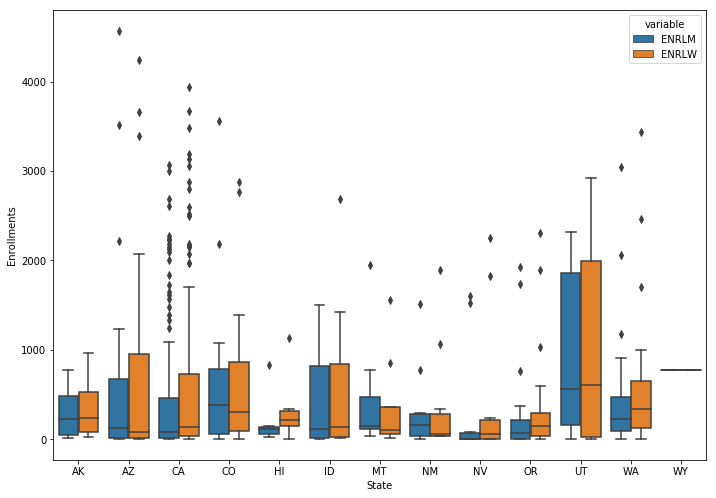

In [239]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
fig2 = sn.boxplot(x="STABBR", y="value", hue="variable", data=df);
fig2.set(xlabel='State', ylabel='Enrollments');

Calculating the ratio of ADMSSNW/ADMSSNM:

In [184]:
c['Ratio'] = c['ADMSSNW']/c['ADMSSNM']
c.head()

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,Ratio
0,100654,Alabama A & M University,35762,AL,1568.0,652.0,916.0,3878.0,2276.0,1.703866
1,100663,University of Alabama at Birmingham,35294-0110,AL,2021.0,758.0,1263.0,3437.0,2062.0,1.666828
2,100690,Amridge University,36117-3553,AL,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,35899,AL,1213.0,735.0,478.0,1537.0,1930.0,0.796373
4,100724,Alabama State University,36104-0271,AL,1172.0,434.0,738.0,2862.0,1293.0,2.213457


Filtering the data based on ZIP Codes;Since we have to basically focus on institutions with more than 1000 enrollments;we can drop the data with NaN values in Enrollment and Admissions column

In [205]:
bay_data = c[c['ZIP'].str.startswith('950')|c['ZIP'].str.startswith('94')]
bay_data.dropna().head()

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,Ratio
226,110370,California College of the Arts,94107-2247,CA,255.0,84.0,171.0,1112.0,419.0,2.653938
241,110574,California State University-East Bay,94542,CA,1596.0,588.0,1008.0,7039.0,3891.0,1.809047
246,110635,University of California-Berkeley,94720,CA,6182.0,2997.0,3185.0,7766.0,6209.0,1.250765
254,110714,University of California-Santa Cruz,95064-1011,CA,4221.0,2149.0,2072.0,15883.0,12569.0,1.263665
261,111188,California State University Maritime Academy,94590,CA,241.0,206.0,35.0,184.0,646.0,0.284830


In [209]:
filtered_data = bay_data[bay_data['ENRLT']>1000.0].sort_values(by = 'Ratio')
filtered_data.head()

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,Ratio
4247,243744,Stanford University,94305,CA,1739.0,854.0,885.0,1087.0,1031.0,1.054316
246,110635,University of California-Berkeley,94720,CA,6182.0,2997.0,3185.0,7766.0,6209.0,1.250765
254,110714,University of California-Santa Cruz,95064-1011,CA,4221.0,2149.0,2072.0,15883.0,12569.0,1.263665
505,122931,Santa Clara University,95053,CA,1317.0,650.0,667.0,4271.0,3377.0,1.264732
490,122597,San Francisco State University,94132,CA,3642.0,1483.0,2159.0,15688.0,9016.0,1.740018


Plotting a Barplot

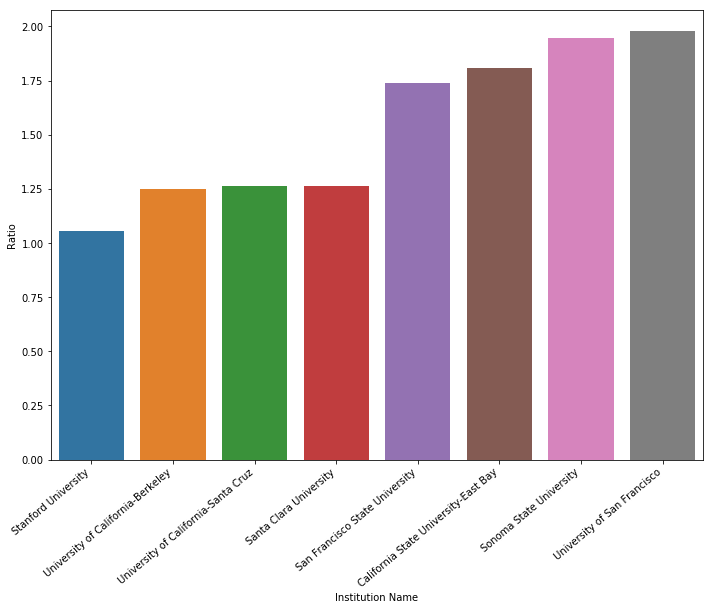

In [236]:
from numpy import mean
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sn.barplot(x="INSTNM", y="Ratio", data=filtered_data,estimator=mean);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
ax.set(xlabel='Institution Name', ylabel='Ratio');

Plot 3 clearly indicates that more women are admitted than men in University of San francisco than Stanford University
Plot 2 clearly indicates that Utah has the highest Enrollment Rate and Women Enrollments are more than Men Enrollments there.
PLot 1 clearly indicates that Utah has highest Enrollments with no outliers whereas AZ has few outliers.s